# Classifying Movie Genres Based on the Title and Plot

Cameron Wonchoba

Andrew Leo

Tou Yang

# Overview

Movies are put into categories called `genres`. These genres describe the expectations that a person should have when they watch the movie.

We are given a data set that maps each movie title and their plot to the genre they are in. Using Natural Language Processing, we will identify what genre the movie is based on the title and plot. 

Developing a tool that can accurately identify these genres based on the genre and plot may help movie creators effectively write a movie title and generic plot. Once they create their title and plot, they could pass it into this model and verify that it conveys the message that they intend.

This is a multiclass classification problem that will utilize Natural Language Processing.

## What is Natural Language Processing?

Natural Language processing allows computers to analyze and understand human written language. Ultimately, we want to be able to parse the natural language in a way that is valuable. 

There are two parts of a language that the computer needs to be able to understand:

### Syntax
Syntax describes the way we arrange words to make a sentence that is grammatically correct. Syntax is important to help the computer learn the structure of our language. It helps to learn if each sentence is grammatically correct or not. 

### Semantics
Semantics describes the meaning behind each word, sentence or phrase. Semantics are important to help the computer understand the meaning behind indiviudal words and combination of words. This becomes difficult when words have more than one meaning. For example:

1. I crashed my car.
2. I crashed on my couch.

Here, the word "crashed" have different meanings. 

In the first example, "crashed" means destroyed or ruined.

In the second example, "crashed" means sleep.

Helping a computer understand these subtle differences in meaning can be difficult to do.

## Techniques/Libraries to Used in NLP
Below is a list of libraries and tools that may help us in the project.

1. Natural Language Toolkit (NLTK)
    * https://www.nltk.org/
    * Slow and steep learning curve 
2. TextBlob
    * https://textblob.readthedocs.io/en/dev/
    * Easy to learn (great for beginners!), but it is slow
3. CoreNLP
    * https://stanfordnlp.github.io/CoreNLP/
    * Really fast and can be integrated with NLTK
4. Gensim
    * https://github.com/RaRe-Technologies/gensim
    * Specializes in semantic recognition
5. spaCy
    * https://spacy.io/
    * Really fast! Only supports 7 languages (Python is one of them, so we're good).
6. polyglot
    * https://polyglot.readthedocs.io/en/latest/index.html
    * Similar performance to spaCy but supports more languages.
7. scikit–learn
    * https://scikit-learn.org/stable/
    * Great documentation and familiar. Does not use Neural Networks for processing, so it isn't as good.
8. Pattern
    * https://www.clips.uantwerpen.be/pages/pattern
    * Good for webmining, but doesn't include enough NLP tasks


Sources:

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://sunscrapers.com/blog/8-best-python-natural-language-processing-nlp-libraries/

# Topic Modeling
Here we are going to do a form of topic modeling. Topic Modeling is trying to understand the topic of a piece of text. In our case, the topic can be defined as the genre. We will try to figure out the genre of the movie (topic).

# Data

The data set that we are using can be found here: https://github.com/davidsbatista/text-classification/blob/master/movies_genres.csv.bz2

This data set includes the title, plot and genre of 117,352 movies. The genres that are included in this data set are:
* Action
* Adult 
* Adventure
* Animation
* Biography
* Comedy
* Crime
* Documentary
* Drama
* Family
* Fantasy
* Game-Show
* History
* Horror
* Lifestyle
* Music
* Musical
* Mystery
* News
* Reality-TV
* Romance
* Sci-Fi
* Short
* Sport
* Talk-Show
* Thriller
* War
* Western

> NOTE: Each movie is mapped to only one genre. In practice, it may be the case that movies are mapped to more than one genre.

In [1]:
import pandas as pd
import numpy as np
import time
pd.set_option('display.max_columns', None)

In [2]:
path_to_data = "../data/movies_genres.csv"
movies = pd.read_csv(path_to_data, delimiter='\t')

In [3]:
movies.head(3)

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Lifestyle,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [4]:
import nltk
nltk.download('all') # This takes awhile

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\c

[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]  

[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package porter_test is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [5]:
print(f"There are {movies.shape[0]} rows and {movies.shape[1]} columns.")

There are 117352 rows and 30 columns.


In [6]:
print(f"The movie genres are:\n",'\n'.join(movies.columns[2:].tolist()))

The movie genres are:
 Action
Adult
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Game-Show
History
Horror
Lifestyle
Music
Musical
Mystery
News
Reality-TV
Romance
Sci-Fi
Short
Sport
Talk-Show
Thriller
War
Western


In [7]:
print("Count of each movie:\n")
movie_counts = []
for col in movies.columns[2:]:
    movie_counts += [(col, movies[col].sum())]
movie_counts_df = pd.DataFrame(movie_counts, columns = ["Genre", "Count"])

movie_counts_df = movie_counts_df.sort_values('Count', ascending=False)
movie_counts_df

Count of each movie:



,Genre,Count
8,Drama,46017
5,Comedy,33875
20,Romance,19242
9,Family,15442
6,Crime,15133
0,Action,12381
19,Reality-TV,12338
17,Mystery,12030
7,Documentary,12020
3,Animation,11375


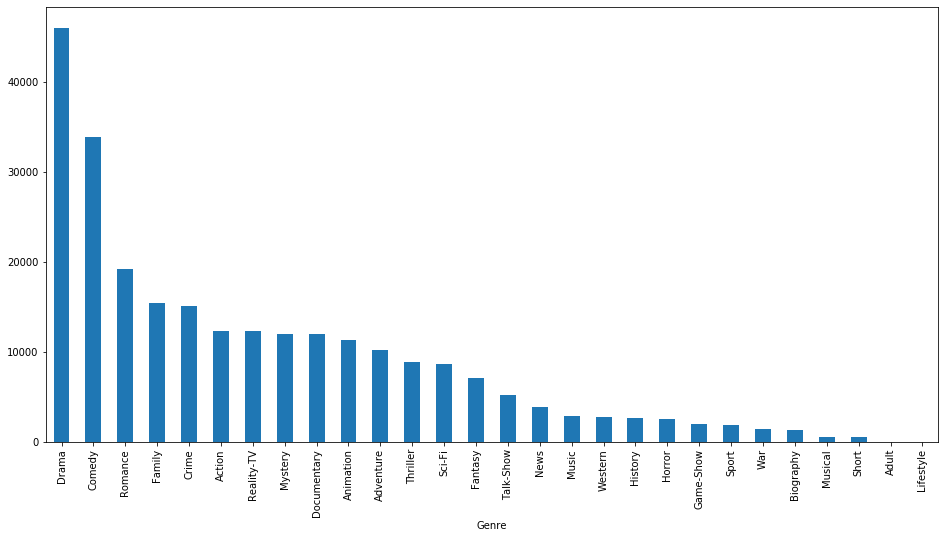

In [8]:
movie_counts_df.plot(x='Genre', y='Count', kind='bar', legend=False, figsize= (16,8))

The most common movie genres are:
* Drama
* Comedy 
* Romance
* Family
* Crime

The least common movie genres are:
* Lifestyle
* Adult
* Short
* Musical
* Biography

There are 0 "lifestyle" movies. We can drop this column.

In [9]:
movies = movies.drop(columns=['Lifestyle'], axis=1)

Are there any weird values in the table?

In [10]:
movies.isnull().any()

title          False
plot           False
Action         False
Adult          False
Adventure      False
Animation      False
Biography      False
Comedy         False
Crime          False
Documentary    False
Drama          False
Family         False
Fantasy        False
Game-Show      False
History        False
Horror         False
Music          False
Musical        False
Mystery        False
News           False
Reality-TV     False
Romance        False
Sci-Fi         False
Short          False
Sport          False
Talk-Show      False
Thriller       False
War            False
Western        False
dtype: bool

All values exist

## Lets look at the actual titles and plots

In [11]:
movies['title']

0                                      "#7DaysLater" (2013)
1              "#BlackLove" (2015) {Crash the Party (#1.9)}
2         "#BlackLove" (2015) {Making Lemonade Out of Le...
3             "#BlackLove" (2015) {Miss Independent (#1.5)}
4            "#BlackLove" (2015) {Sealing the Deal (#1.10)}
                                ...                        
117347                      "Ørnen: En krimi-odyssé" (2004)
117348                           "Øyevitne" (2014) {(#1.1)}
117349                           "Øyevitne" (2014) {(#1.3)}
117350                           "Øyevitne" (2014) {(#1.5)}
117351         "Über Österreich - Juwele des Landes" (2016)
Name: title, Length: 117352, dtype: object

Movie titles are surrounded by quotes. We will extract them using the following regular expression:

`"([^"]*)"`

In english, this regular expression can be read as:

Match everything that starts with quotes, contains anything that isn't a quote, followed by zero or more things, followed by a quote. 

In [12]:
# Lets extract the title name.
movies['Extracted Title'] = movies['title'].str.extract(r'"([^"]*)"')

# Now remove the first occurence of the '#' from the string.
movies['Extracted Title'] = movies['Extracted Title'].str.replace('#',"",1)

The year the title was made is surrounded by paranthesis. We will extract them using the following regular expression:

`\((.*?)\)`

In [13]:
movies['year'] = movies['title'].str.extract(r'\((.*?)\)')

It turns out that we also have tv shows in this data set. These can be discovered if there is some text surround by curly braces ({}). We can extract these by using the folloiwng regular expression:

`\{(.*?)\}`

We will then get rid of the episode number (these are defined by paranthesis).

`\(.*\)`

In [14]:
movies['Episode Info'] = movies['title'].str.extract(r'\{(.*?)\}')
movies['Episode Info'] = movies['Episode Info'].str.replace(r"\(.*\)","")

# Detecting languages
We should look at what languages we have. We should only deal with the english language for now.

We will detect the language of the plot. We choose the plot because it has the most words, and it is supposed to be grammatically correct. We can assume that they are grammatically correct as they are uploaded onto IMbD.

https://pypi.org/project/langdetect/

In [15]:
from langdetect import detect

# Apply the detect function for every row on the "plot" column.
# NOTE: This takes a while to complete.
movies['Language'] = movies.apply(lambda row : detect(row['plot']), axis=1)

In [16]:
movies['Language'].value_counts()

en    117198
nl       120
de        14
it         6
da         5
es         2
fr         2
pt         2
hu         1
no         1
sv         1
Name: Language, dtype: int64

There are some non-english movies in this set. Lets drop the rows that aren't english.

In [17]:
# Keep rows that are in english.
movies = movies[movies['Language'] == 'en']

# Reset the index as they are now messed up (due to the removal of rows)
movies = movies.reset_index()

movies['Language'].value_counts()

en    117198
Name: Language, dtype: int64

# Tokenization
Now we need to tokenize all of the words.

We are opting for the `TweetTokenizer` instead of word_tokenize because the word_tokenizer doesn't seem to handle apostophe's very well. For example:

Give the word `week's`

* word_tokenizer => ['week',"'s"]

* TweetTokenizer => ["week's"]

In [18]:
from nltk.tokenize import TweetTokenizer

start = time.time()

tokenizer = TweetTokenizer()

# For every plot, split it into its respective tokens.
movies["plot_tokens"] =  movies.apply(lambda row : tokenizer.tokenize(row['plot']), axis=1)

print("Time Elapsed: ", time.time() - start)

Time Elapsed:  50.78066563606262


In [19]:
movies['plot'][0]

" #7dayslater is an interactive comedy series featuring an ensemble cast of YouTube celebrities. Each week the audience writes the brief via social media for an all-new episode featuring a well-known guest-star. Seven days later that week's episode premieres on TV and across multiple platforms."

In [20]:
movies['plot_tokens'][0]

['#7dayslater',
 'is',
 'an',
 'interactive',
 'comedy',
 'series',
 'featuring',
 'an',
 'ensemble',
 'cast',
 'of',
 'YouTube',
 'celebrities',
 '.',
 'Each',
 'week',
 'the',
 'audience',
 'writes',
 'the',
 'brief',
 'via',
 'social',
 'media',
 'for',
 'an',
 'all-new',
 'episode',
 'featuring',
 'a',
 'well-known',
 'guest-star',
 '.',
 'Seven',
 'days',
 'later',
 'that',
 "week's",
 'episode',
 'premieres',
 'on',
 'TV',
 'and',
 'across',
 'multiple',
 'platforms',
 '.']

We now have our tokens for each row.

Lets extract these tokens into a list, and find the 20 most common tokens.

In [21]:
# I'm also curious as to how many total tokens we have

plot_tokens_lst = movies["plot_tokens"].tolist()

token_count = 0
for sentence in plot_tokens_lst:
    token_count += len(sentence)

print("Total Number of Tokens: ", token_count)

Total Number of Tokens:  13016804


In [22]:
from nltk.probability import FreqDist
fdist = FreqDist()

for sentence in plot_tokens_lst:
    for word in sentence:
        fdist[word.lower()]+=1
        
fdist.most_common(20)

[('the', 610626),
 ('.', 588004),
 (',', 544196),
 ('to', 414372),
 ('and', 363401),
 ('a', 334313),
 ('of', 221383),
 ('in', 179132),
 ('is', 174161),
 ('his', 129561),
 ('her', 124689),
 ('with', 124588),
 ('he', 108869),
 ('for', 105977),
 ('that', 104342),
 ('on', 83917),
 ('but', 74882),
 ('she', 73014),
 ('"', 71781),
 ('as', 68508)]

In [23]:
# How many unique tokens are there?
print(f"There are {len(fdist)} unique tokens.")

There are 186305 unique tokens.


These tokens seem uninformative... Lets clean up the tokens a bit by removing puncutation and stop noises.

# Removing Noise
Stemming works by cutting off the ends of the words. However, this doesn't always work. Sometimes it will convert a word into a word that is not technically it's root. 

Lemmatization will reduces each word to it's "true" root.

However, we also want to remove the noise (ie. stopwords). To do this, we will use the function that was seen in the In Class 11 exercise.

In addition to cleaning each string, we will also grab the pos_tag of each token and store it.

Originally from: https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.tag import pos_tag

def remove_noise(tokens, stop_words = ()):
    cleaned_tokens = []

    for token, tag in pos_tag(tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())

    return pos_tag(cleaned_tokens)

In [25]:
# NOTE: This code block takes about 25 minutes to run.
from nltk.corpus import stopwords

start = time.time()

movies['plot_tokens_cleaned'] = movies.apply(lambda row : remove_noise(row['plot_tokens'], stopwords.words('english')), axis=1)

print("Time Elapsed: ", time.time() - start)

Time Elapsed:  1754.3151948451996


In [26]:
movies['plot_tokens_cleaned']

0         [(#7dayslater, RB), (interactive, JJ), (comedy...
1         [(one, CD), (week, NN), (leave, VBP), (worksho...
2         [(woman, NN), (start, VB), (make, VB), (stride...
3         [(five, CD), (woman, NN), (independent, JJ), (...
4         [(despite, IN), (go, JJ), (life, NN), (change,...
                                ...                        
117193    [(ørnen, NN), (icelandic, JJ), (inspector, NN)...
117194    [(two, CD), (young, JJ), (kid, NNS), (henning,...
117195    [(someone, NN), (try, NN), (kill, VB), (motorc...
117196    [(helen, VBN), (see, VBP), (investigation, NN)...
117197    [(georg, NN), (riha, NN), (remain, VBP), (mast...
Name: plot_tokens_cleaned, Length: 117198, dtype: object

# Exploring Word Density
We can look at the most common words within each genre.

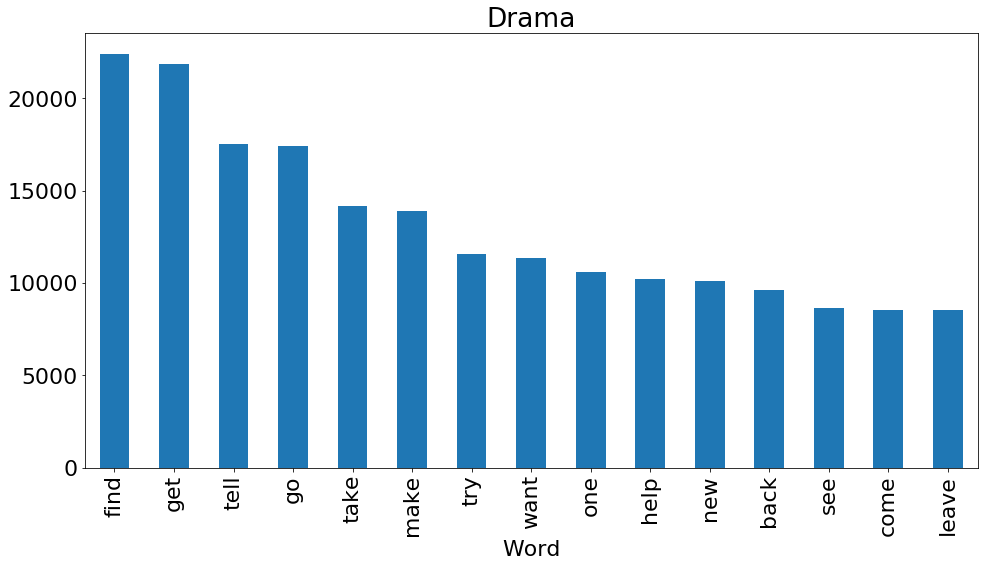

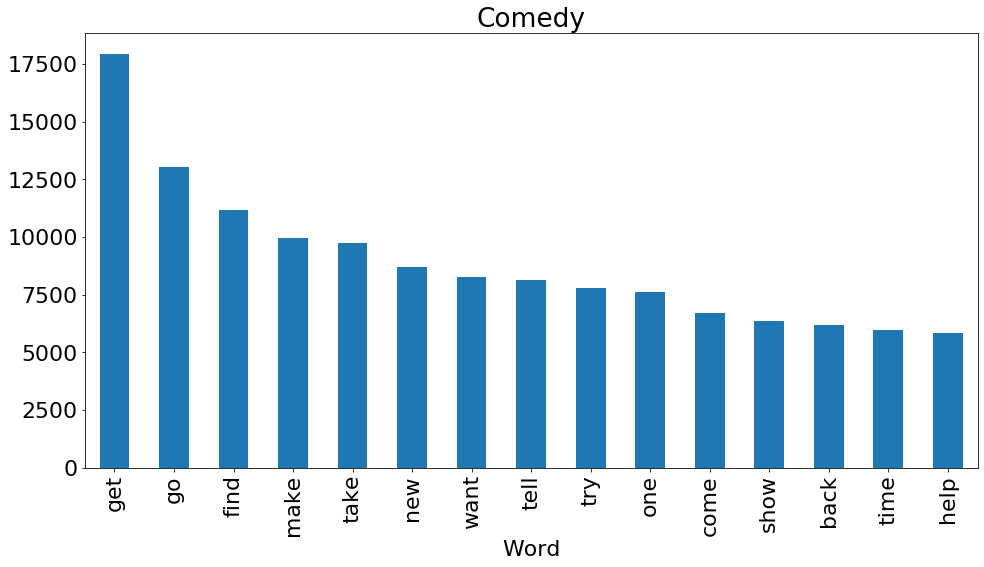

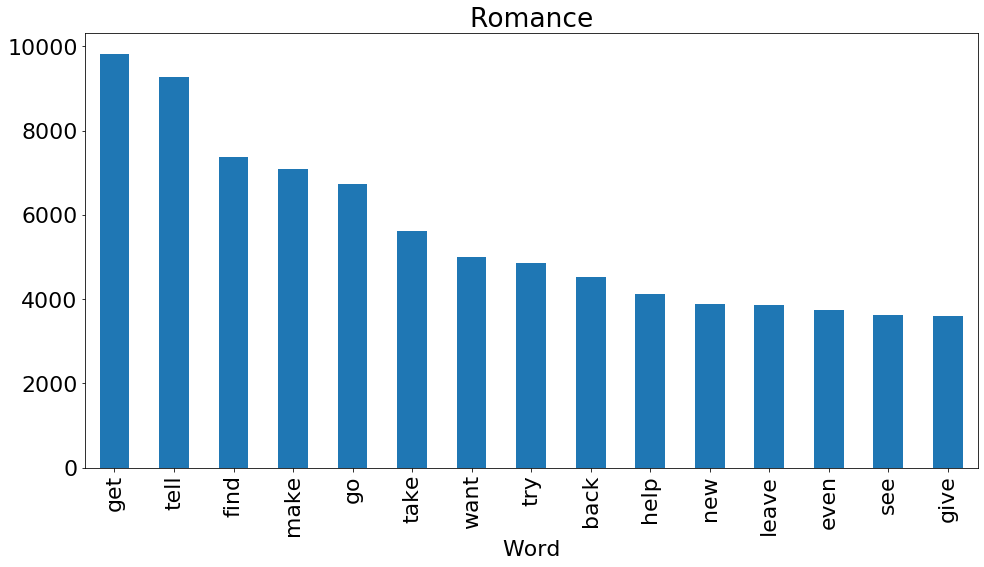

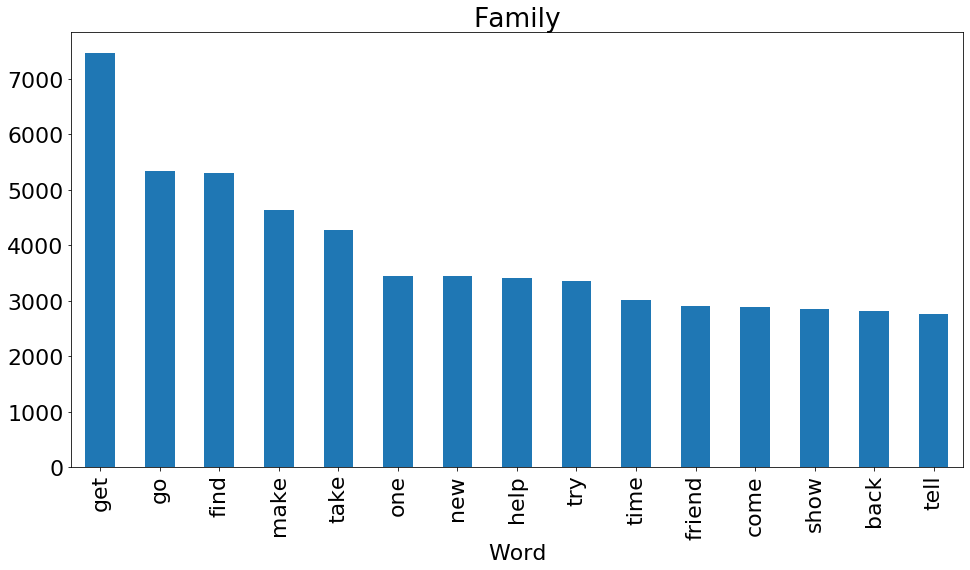

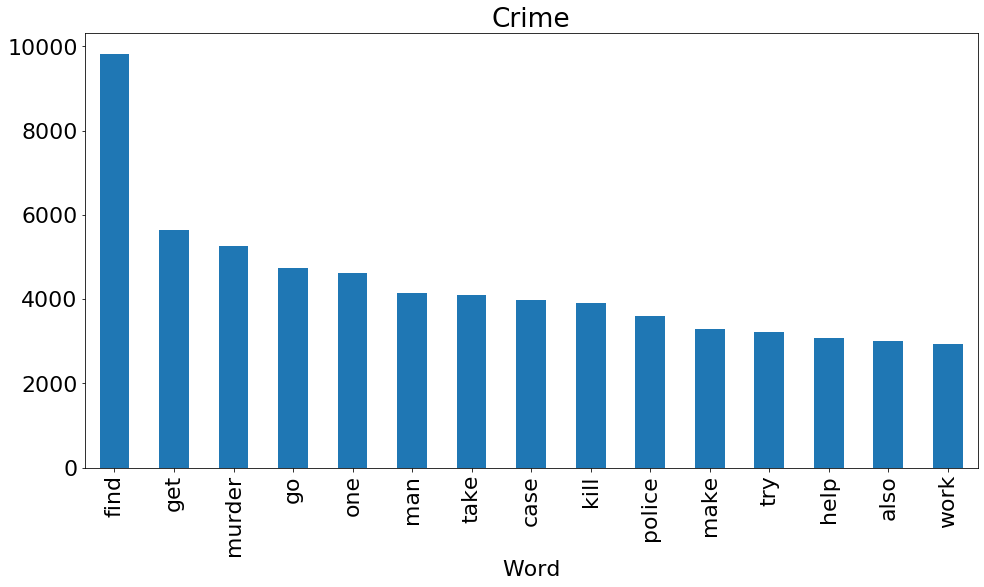

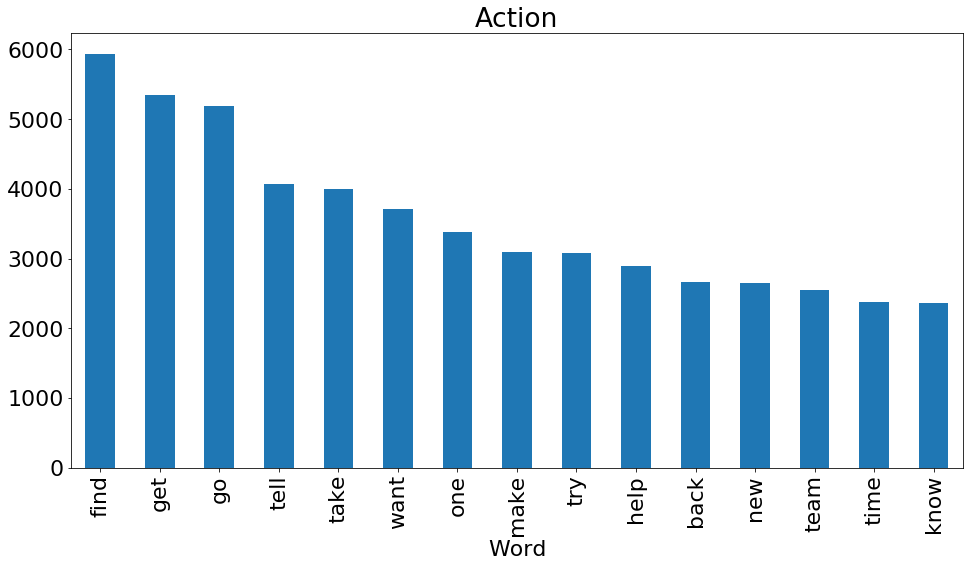

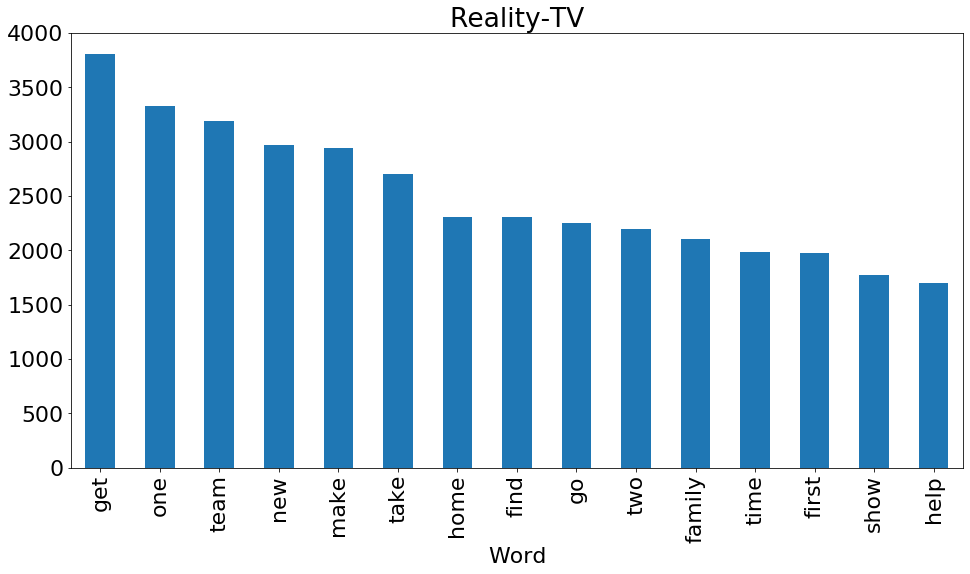

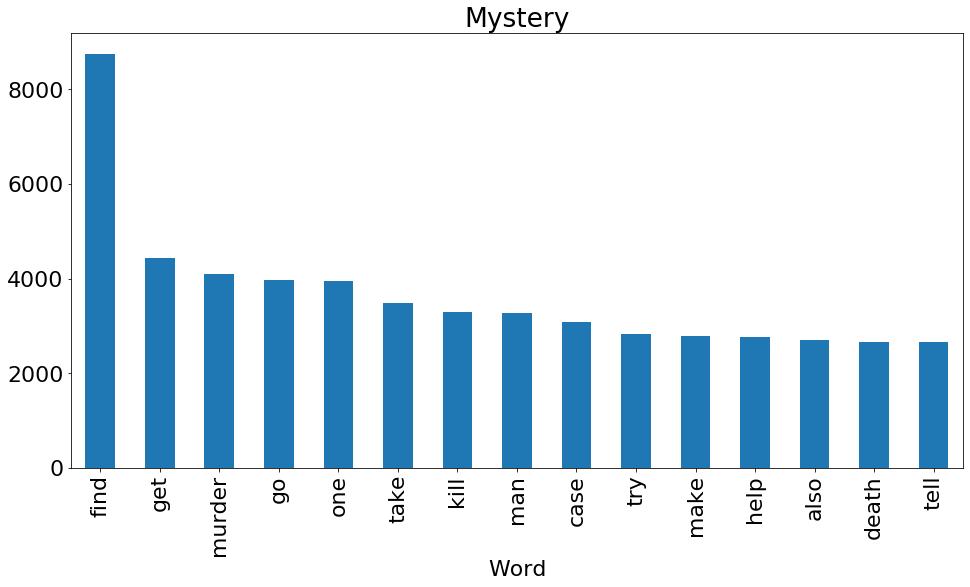

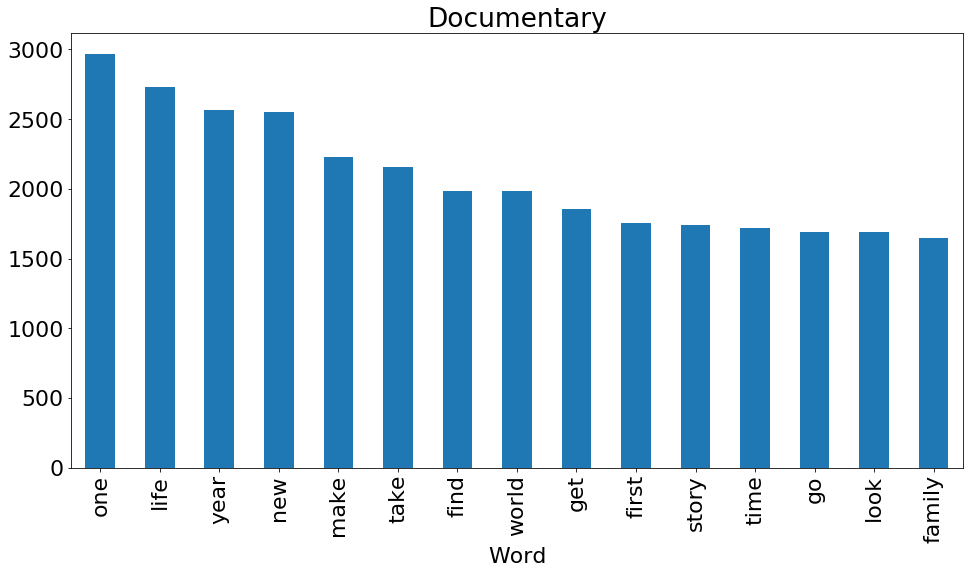

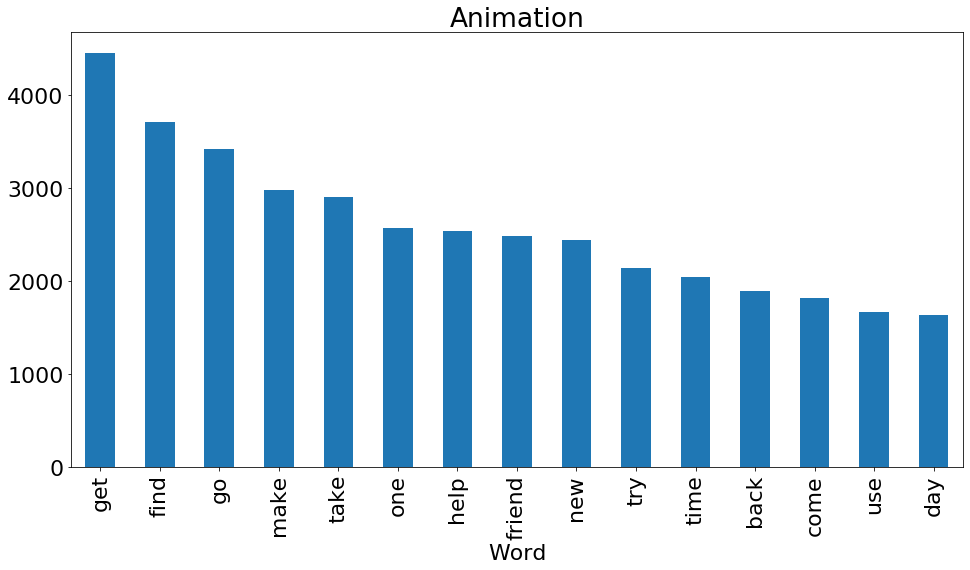

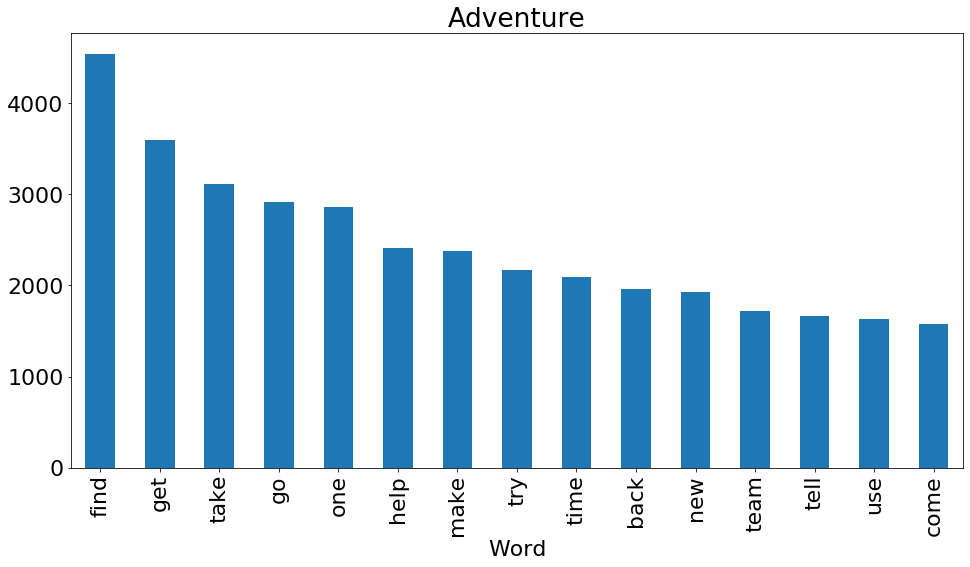

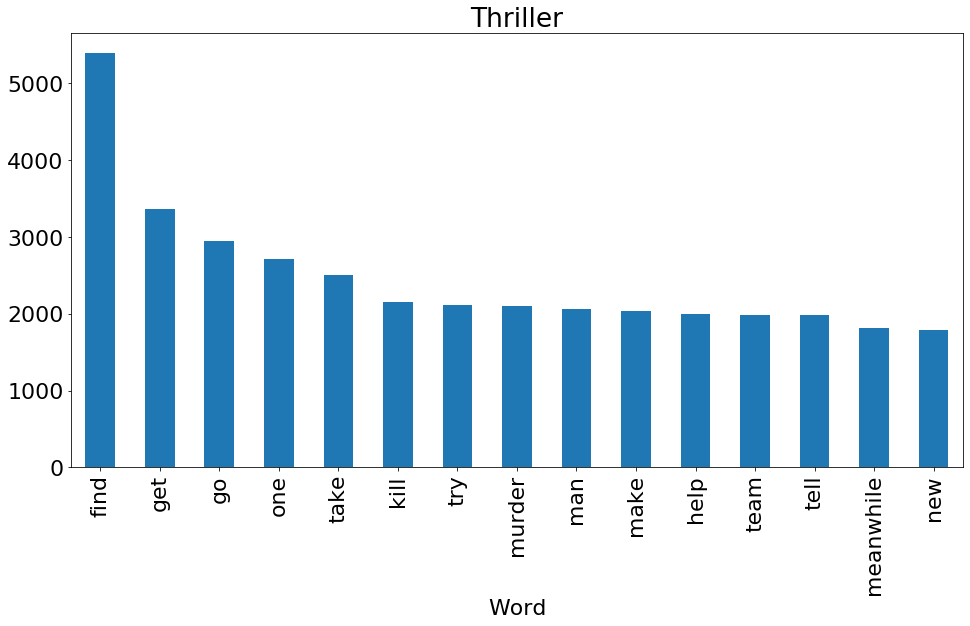

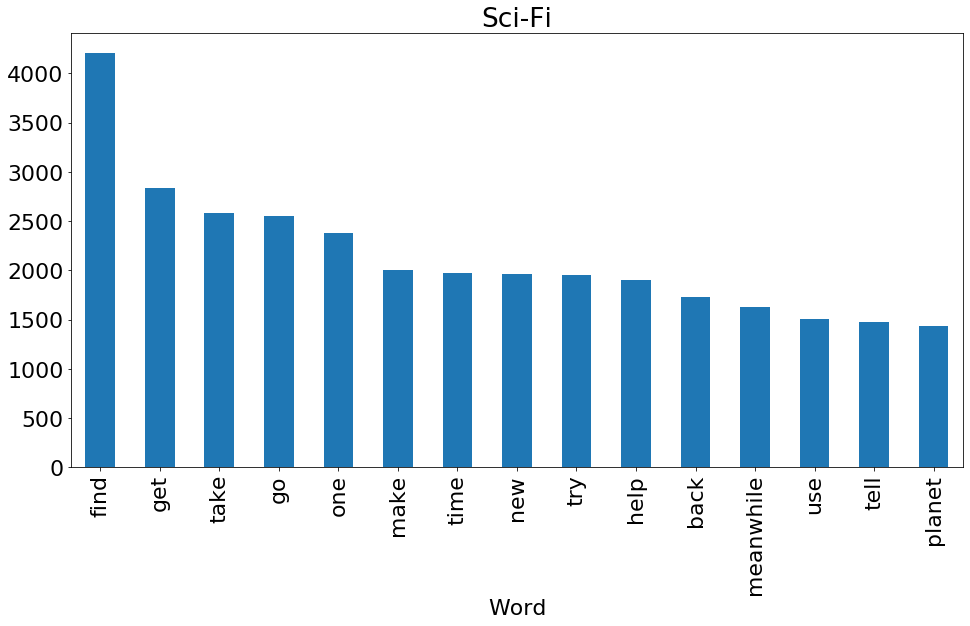

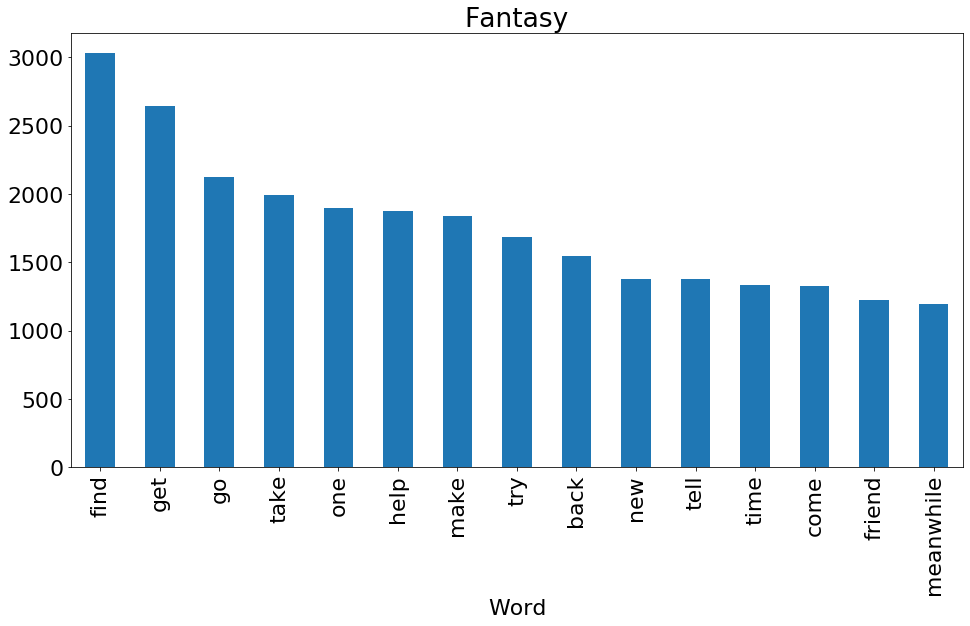

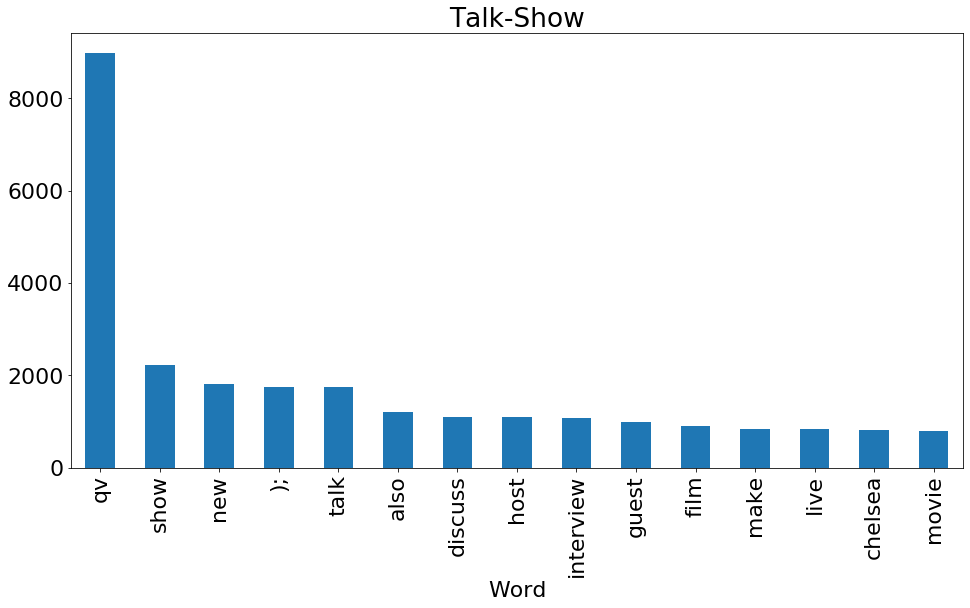

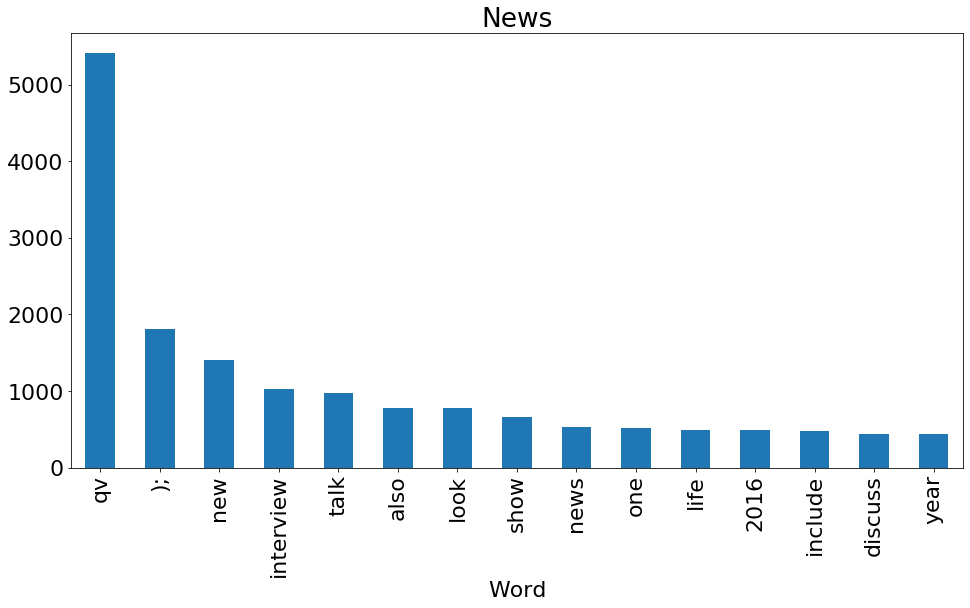

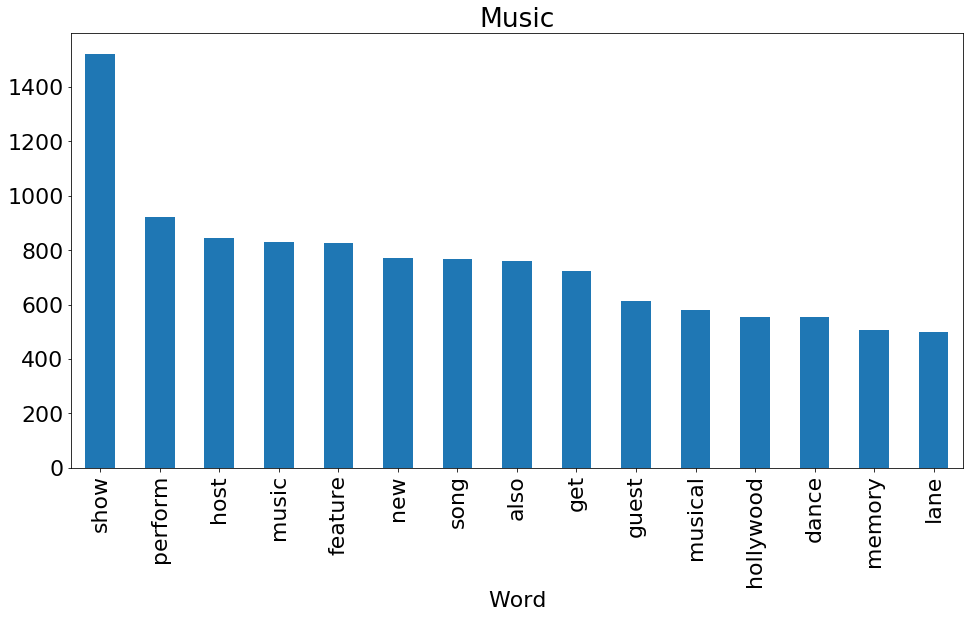

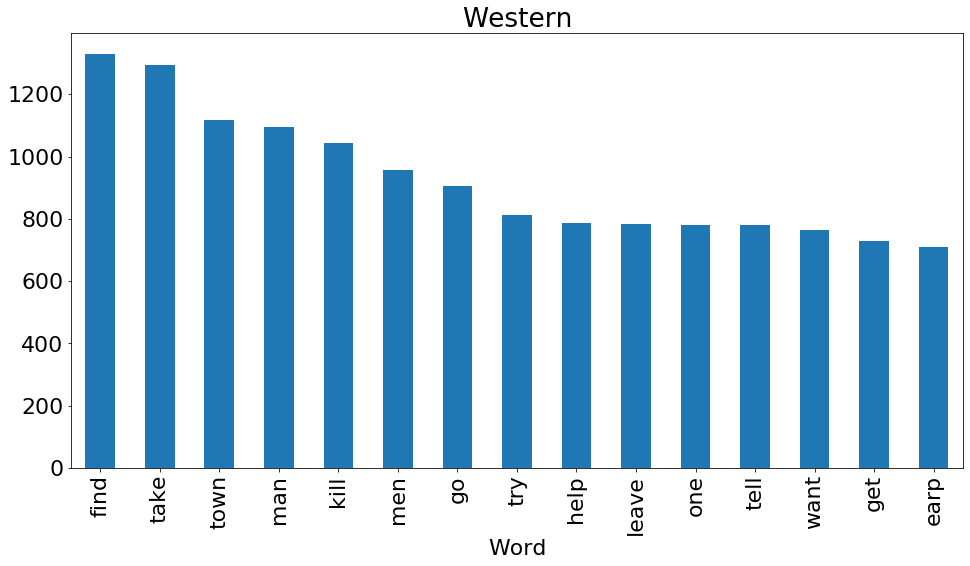

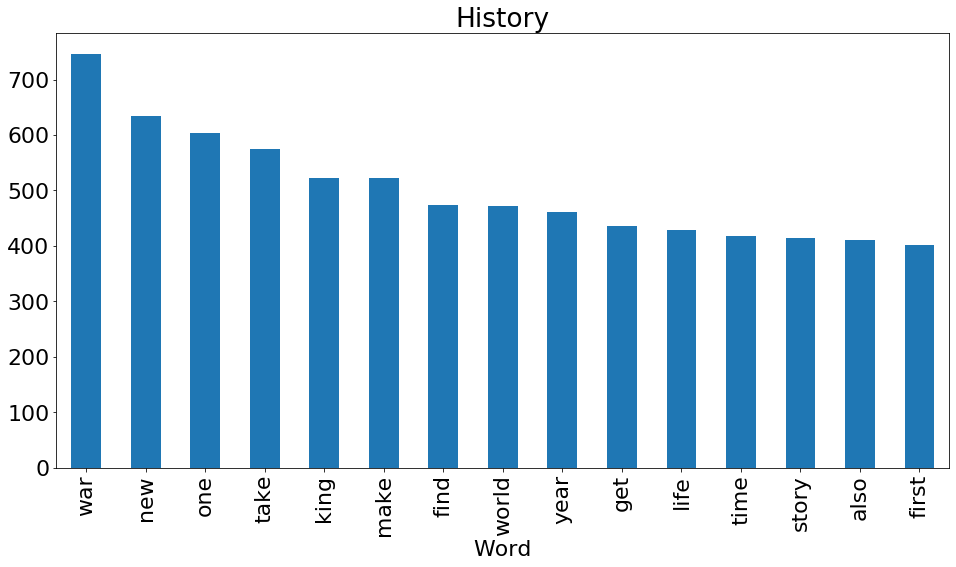

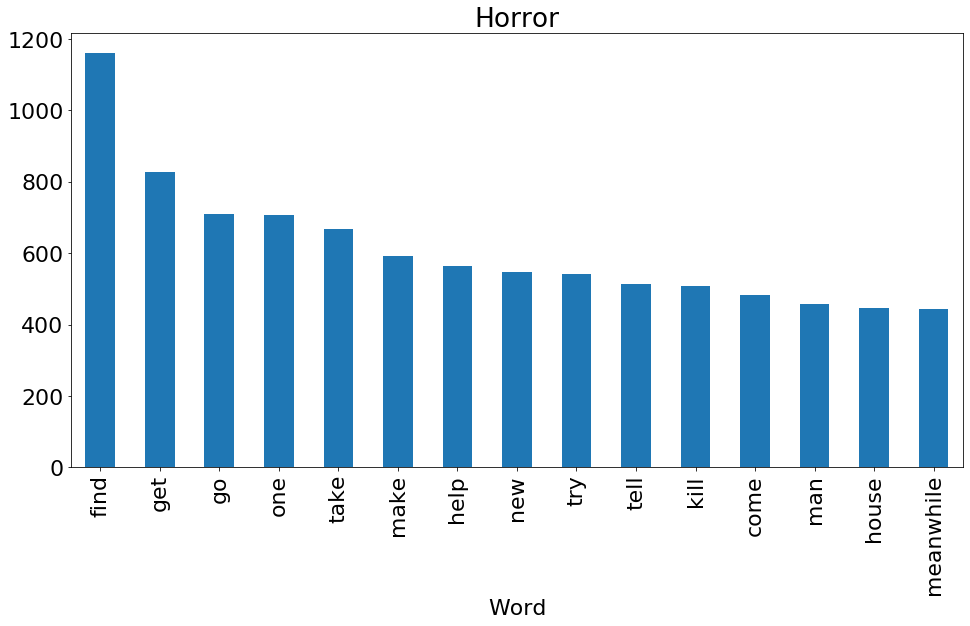

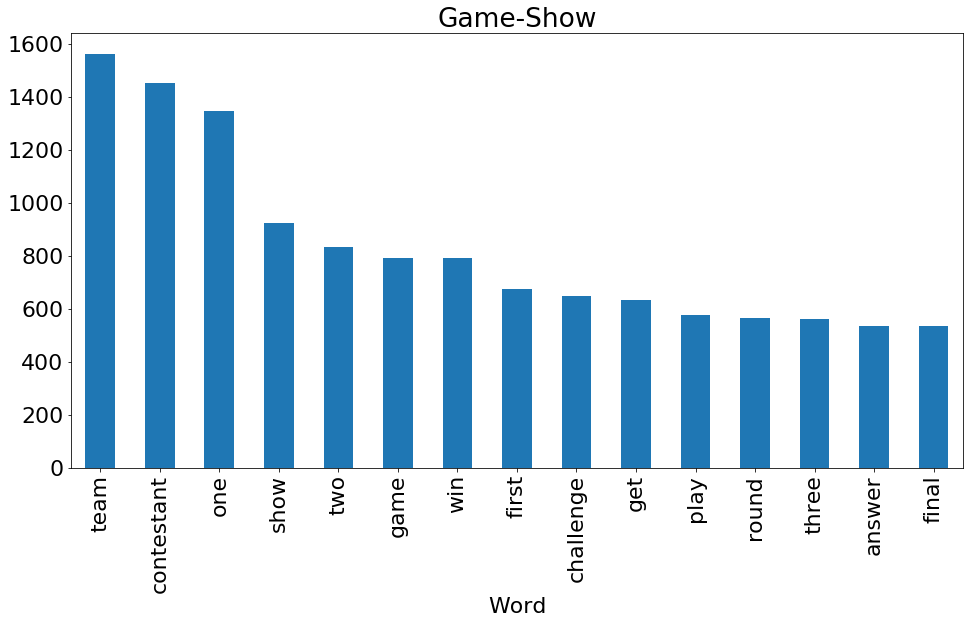

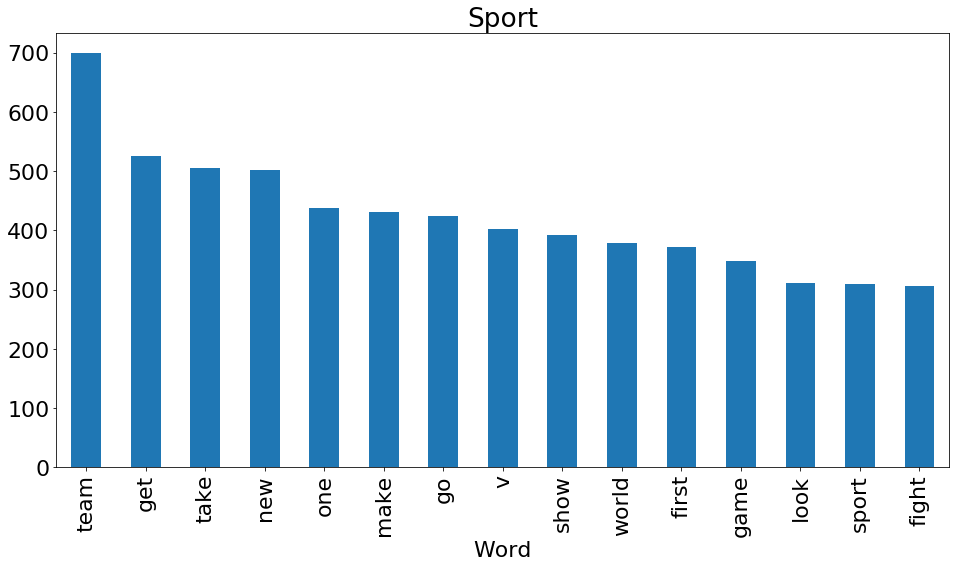

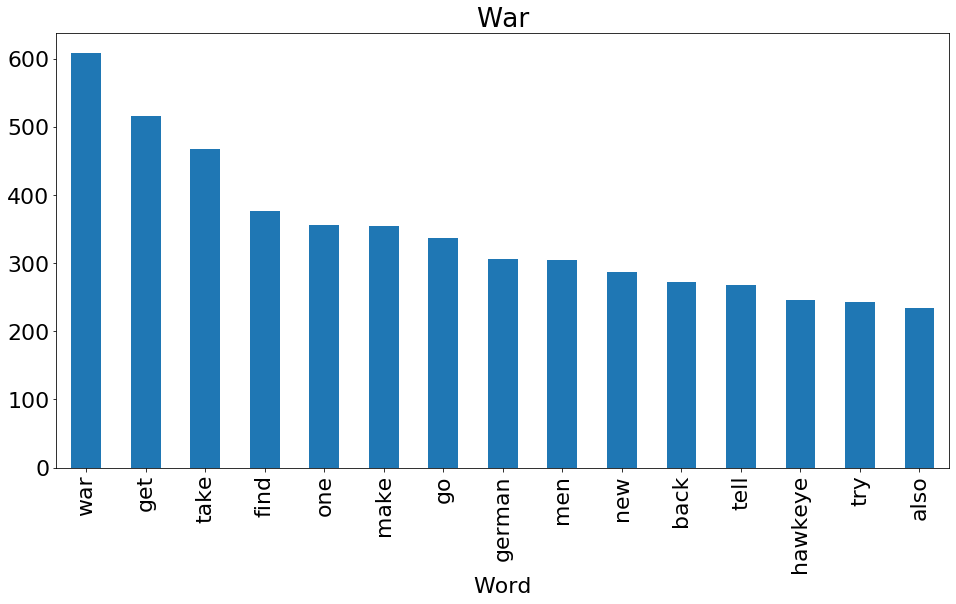

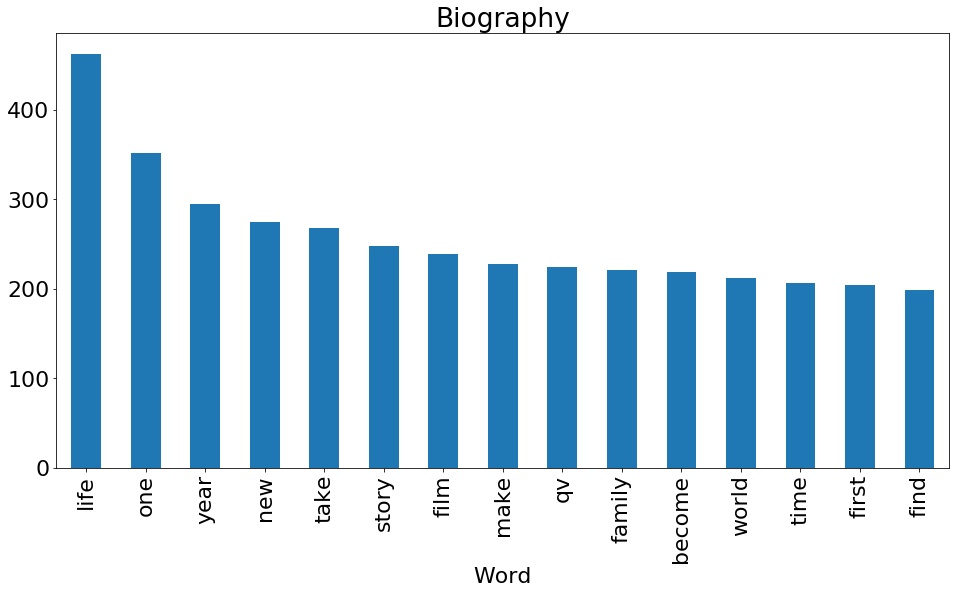

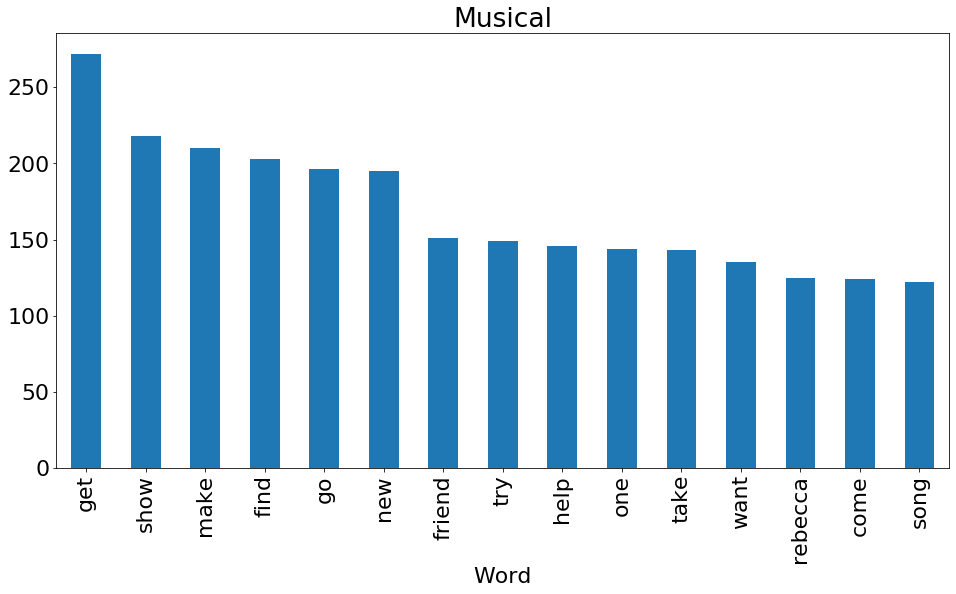

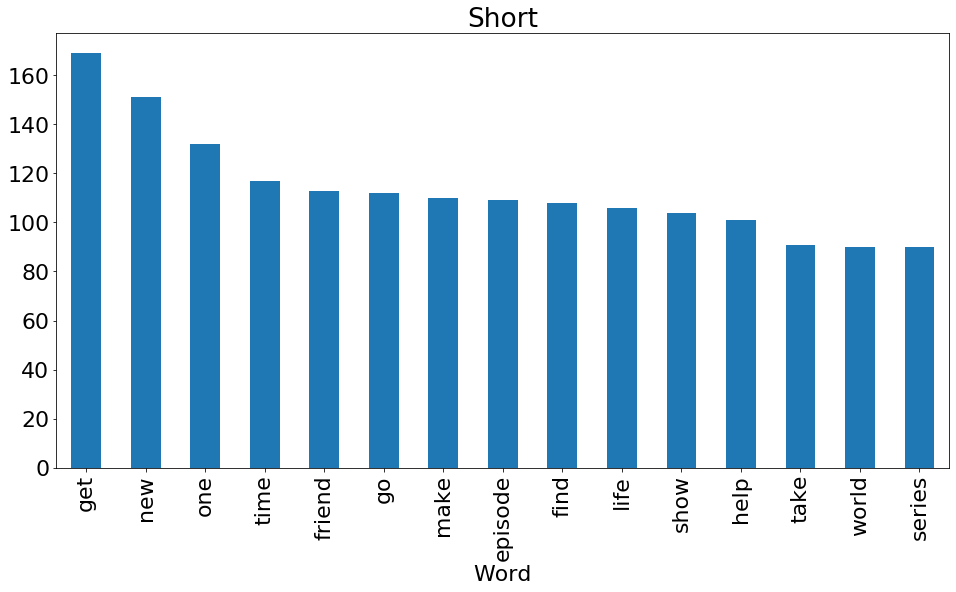

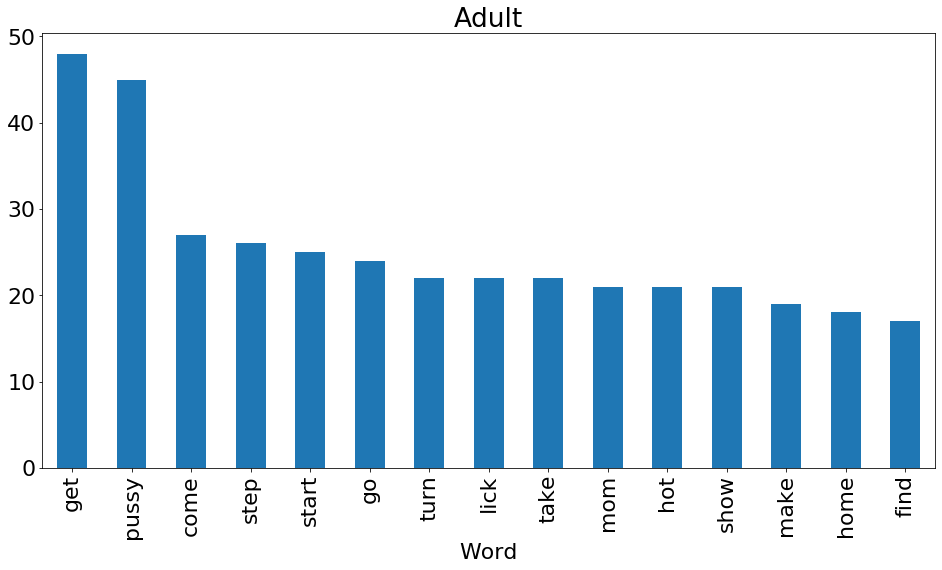

In [27]:
from nltk.probability import FreqDist
import matplotlib
from matplotlib import pyplot as plt

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token[0]

# Lifestyle has zero movies, so we will remove it
movie_counts_df = movie_counts_df[movie_counts_df['Genre'] != 'Lifestyle']

# Iterate through each movie and get the most common words. Maybe plot them?
for movie in movie_counts_df['Genre']:
    all_words = get_all_words(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist())
    fdist = FreqDist(all_words)
    
    matplotlib.rcParams.update({'font.size': 22})
    
    df = pd.DataFrame(fdist.most_common(15),columns=['Word','Count'])
    df.plot(x='Word', y='Count', kind='bar', legend=False, figsize=(16,8))
    
    plt.title(movie)
    plt.show()

We now have a count of the most common words in each genre.

# Sentiment Analysis

We will now look at how positive or negative each plot is.

Using textblob, we are calculating the sentiment polarity of each plot, each of which will lie in the range of [1,-1] where 1 means positive sentiment and -1 means a negative sentiment.

In [28]:
#pip install -U textblob
from textblob import TextBlob

movies['polarity'] = movies['plot'].map(lambda text: TextBlob(text).sentiment.polarity)
movies['plot_len'] = movies['plot'].astype(str).apply(len)

print('5 random Plots with the highest positive sentiment polarity:\n')
pl = movies.loc[movies.polarity == 1, ['plot']].sample(5).values
for p in pl:
    print(p[0],'\n')
    #Only this one takes about 5-15 mins depending on computer

5 random Plots with the highest positive sentiment polarity:

 This program follows a veterinarian in England who treats animals with severe and/or life-threatening injuries. He has a state of the art veterinary facility,but he also uses procedures that he has invented to care for the animals who come in. He has an excellent bed side manner for his 4 legged patients and their 2 legged "parents". 

 Anna Wintour, the legendary editor of Vogue magazine, oversees a competition in which 10 designers get a chance to work alongside industry luminaries to prove they have what it takes to be named Fashion Fund Designer of the Year - an award that comes with $400,000 and a one-year mentorship with some of the biggest names in fashion. 

 Tim Shaw performs experiments to resolve questions including what substance can best muffle an explosion, what will happen to an unit match when exposed to super-heated steam, what happens to a spinning flames, what is the fewest number of planks needed to make

In [29]:
print('5 random Plots with the most neutral sentiment polarity(0):\n')
pl = movies.loc[movies.polarity == 0, ['plot']].sample(5).values
for p in pl:
    print(p[0],'\n')

5 random Plots with the most neutral sentiment polarity(0):

 For their 6th Team Challenge, the cooks were divided into 2 teams and had 1 hour to make a turkey burger and fish taco for the football players and their fans. The players and fans would vote and the losing team will face the pressure test. The pressure test ends with an emotional elimination. 

 Chef 'Curtis Stone (III)' (qv) makes Thanksgiving mash-up dishes like collard greens with cornbread stuffing; organizational expert 'Peter Walsh (VII)' (qv) helps a viewer, who has had a storage unit for 15 years; 'Donny Deutsch' (qv) (_"Donny!" (2015)_ (qv)) stops by; and Rachael cooks minestrone soup. 

 In the fifth season premiere, Max and Caroline team up with the diner staff in a frantic attempt to keep their businesses open when the city targets Han's diner and the cupcake window for destruction. Also, Sophie and Oleg announce that they are trying to have a baby. 

 "State of the Art" examines the Consumer Electronics Show in

In [30]:
print('2 random Plots with the most negative polarity: \n')
pl = movies.loc[movies.polarity == -1, ['plot']].sample(2).values
for p in pl:
    print(pl[0],'\n')

2 random Plots with the most negative polarity: 

[" Juliette frets over hiding her pregnancy before filming a sex scene with movie star Noah West (Derek Hough). Rayna flies her kids to meet her on tour, but learns that her increased fame now that she's engaged to Luke is making Daphne feel entitled, while Maddie is simply miserable."] 

[" Juliette frets over hiding her pregnancy before filming a sex scene with movie star Noah West (Derek Hough). Rayna flies her kids to meet her on tour, but learns that her increased fame now that she's engaged to Luke is making Daphne feel entitled, while Maddie is simply miserable."] 



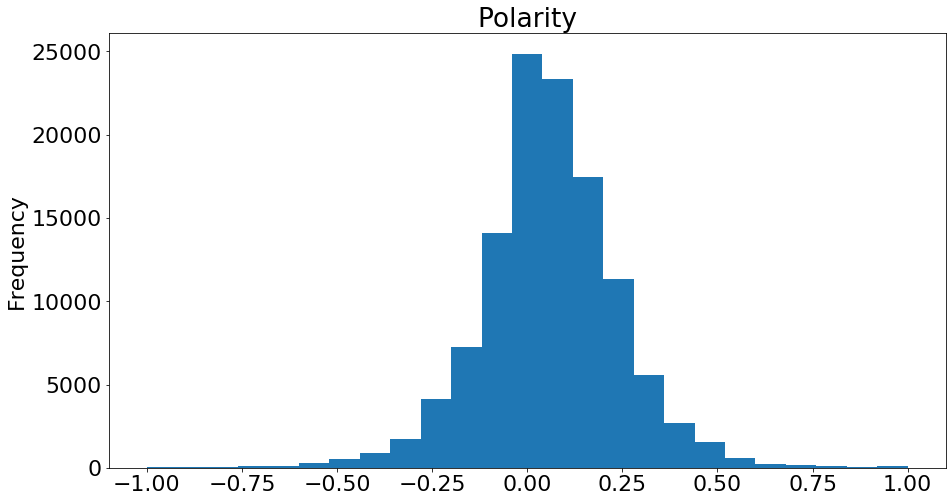

In [31]:
movies['polarity'].plot(
    kind='hist',
    bins = 25,
    legend=False, 
    figsize=(15,8))

plt.title('Polarity')

plt.show()

Vast majority of the sentiment polarity scores are hovering between -0.25 and 0.25, meaning that most of the plots in the database are more neutral sided. It is safe to say that there are more positive plots and negative plots base on the graph above. As you can see the more we more towards 1 or -1 the less amount of plots we get that have a ploarity score of 1 and -1.

Get the average sentiment for each genre, and plot it. This will show us if different Genres tend to display different sentiments.

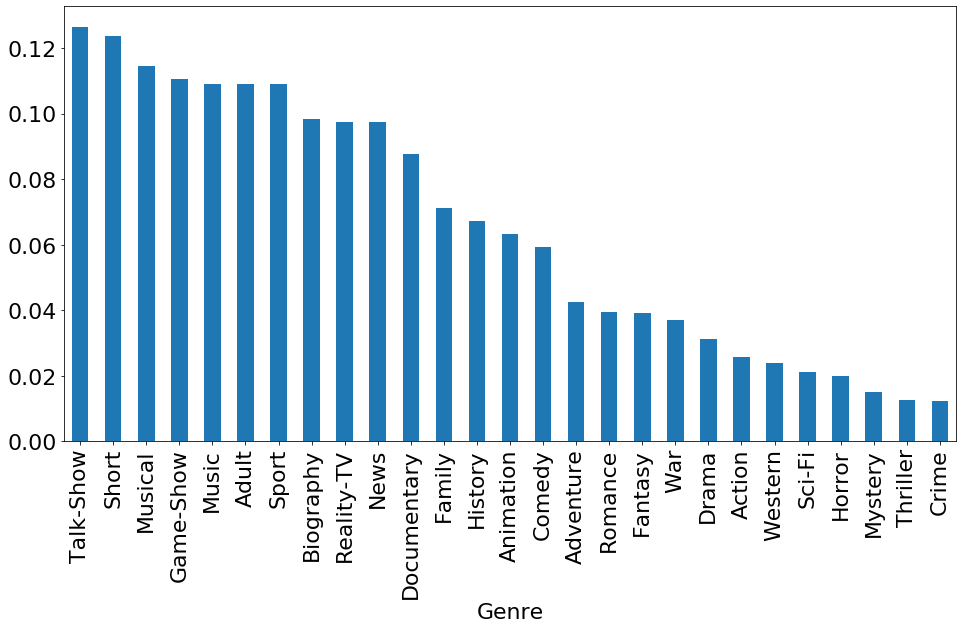

In [78]:
movie_counts_df['Avg Polarity'] = None

movie_counts_df = movie_counts_df.reset_index(drop=True)

for idx, movie in enumerate(movie_counts_df['Genre']):
    movie_counts_df.loc[idx,'Avg Polarity'] = movies[movies[movie] == 1]['polarity'].mean()

movie_counts_df = movie_counts_df.sort_values('Avg Polarity', ascending=False)
movie_counts_df.plot(x='Genre', y='Avg Polarity', kind='bar', legend=False, figsize= (16,8))

Films are generally more positive than not, but some genres have more positive sentiment than others.

Talk-Shows and Shorts generally have really positive plots while Crimes and Thrillers tend to have more negative plots.

# Word Clouds
Finally, we wil build word clouds for the frequency of each word. This is useful as people can quickly take a glance at a word cloud to see which words are the most popular for a given genre.

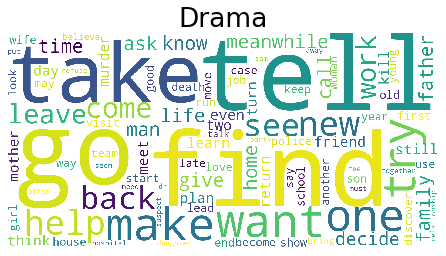

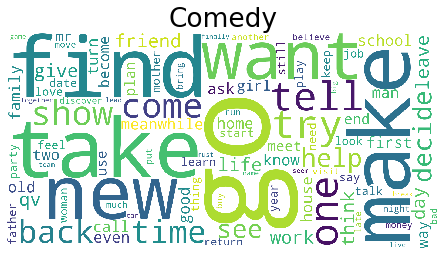

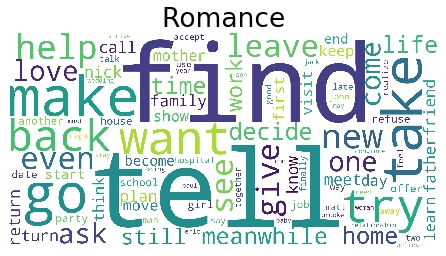

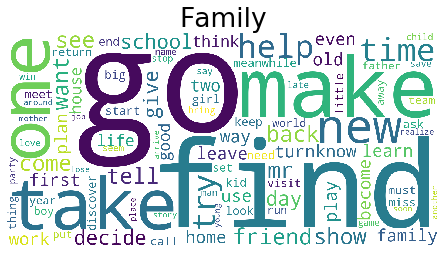

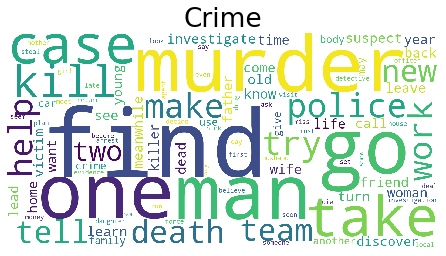

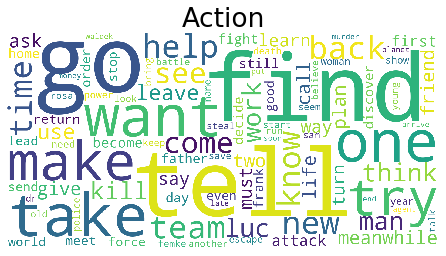

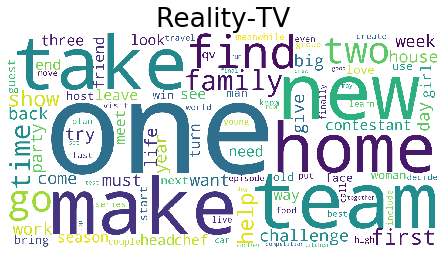

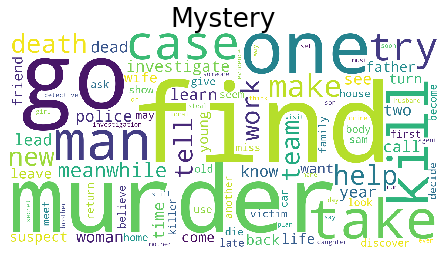

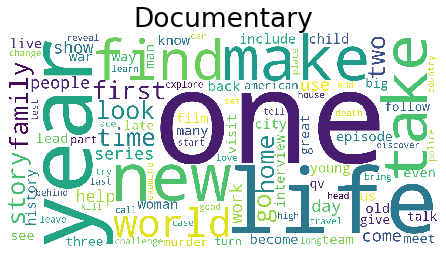

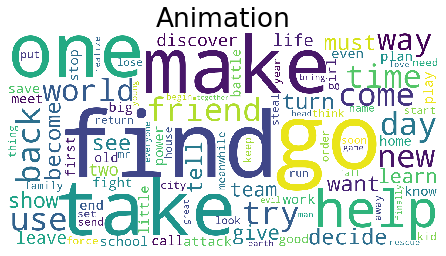

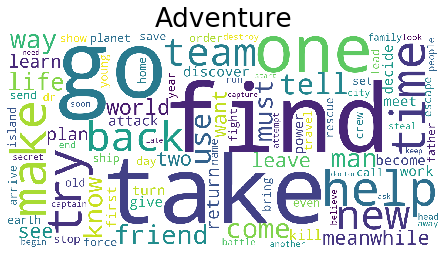

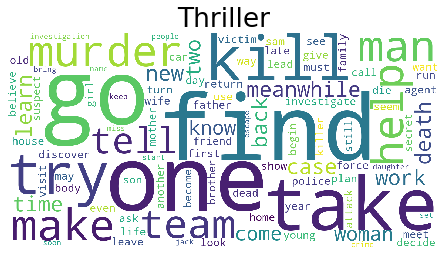

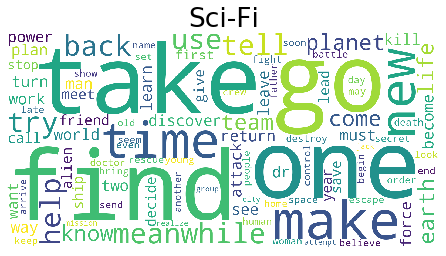

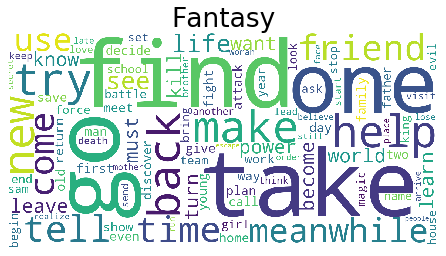

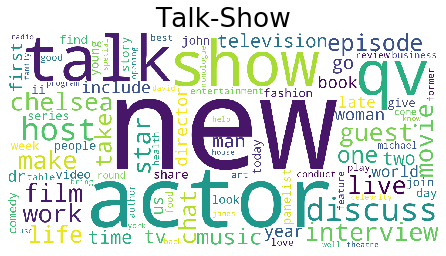

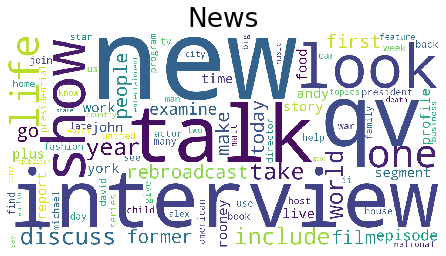

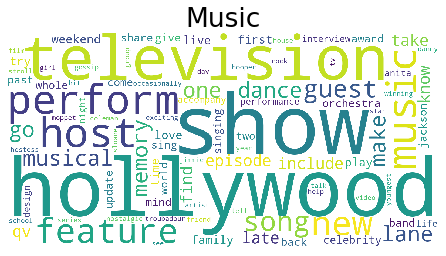

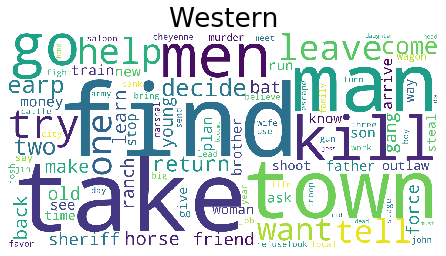

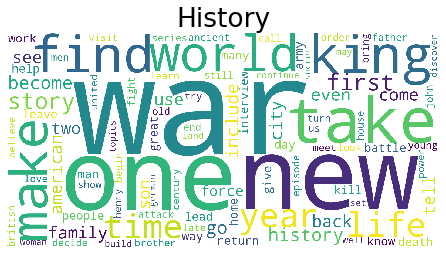

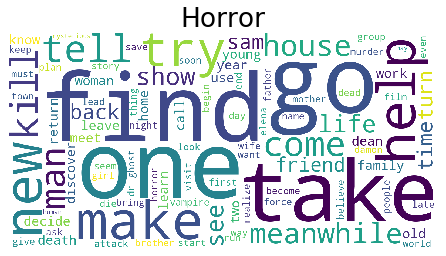

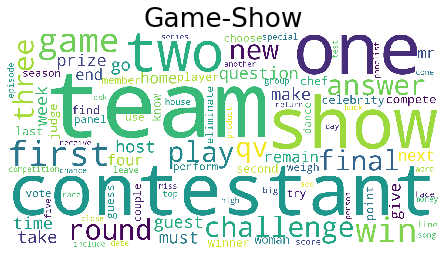

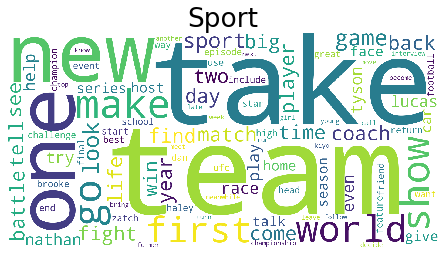

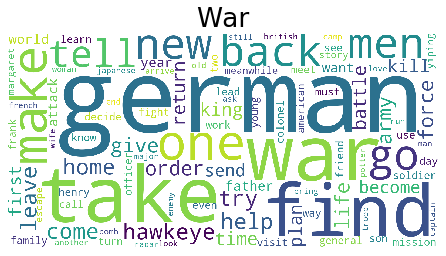

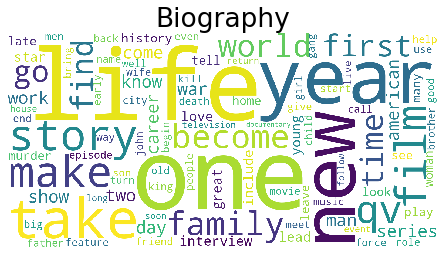

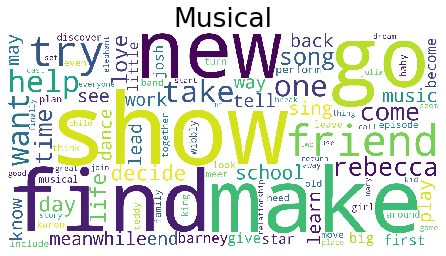

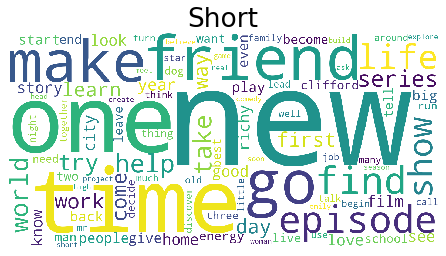

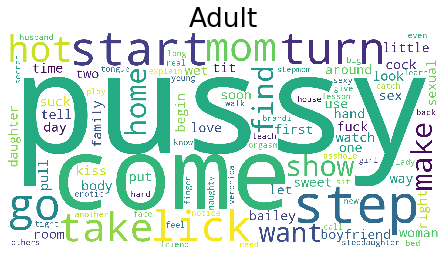

In [32]:
from wordcloud import WordCloud

for movie in movie_counts_df['Genre']:
    all_words = get_all_words(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist())
    fdist = FreqDist(all_words)
    df = pd.DataFrame(fdist.most_common(100),columns=['Word','Count'])
    wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(df['Word'].to_string()) 
    plt.title(movie)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

# Preparing data for Modeling
We will not put labels to each dataset and split them into "training" and "testing". We will have half of each genre be used for training, and the other half be used for testing.

In [33]:
def get_tokens_for_model(cleaned_tokens_list, label):
    for tokens in cleaned_tokens_list:
        token_list = []
        for token in tokens:
            token_list.append([token[0], True])
        yield (dict(token_list), label)
        
data_dict = {}
for movie in movie_counts_df['Genre']:
    data_dict[movie] = list(get_tokens_for_model(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist(), movie))

In [34]:
# Lets see what one of the entries looks like.
data_dict['History'][0]

({'attila': True,
  'talk': True,
  'emotion': True,
  'future': True,
  'depression': True,
  'medium': True,
  'affect': True,
  'reaction': True,
  'situation': True,
  'giving': True,
  'advice': True,
  'people': True,
  'try': True,
  'different': True,
  'thing': True,
  'life': True,
  'order': True,
  'find': True,
  'fit': True,
  'might': True,
  'everything': True,
  'want': True,
  'something': True,
  'new': True,
  'realize': True,
  'good': True,
  'must': True,
  'cause': True,
  'may': True,
  'know': True,
  'else': True},
 'History')

# Now split the data set up

Only use a subset of the data to save time.

In [90]:
train_data = []
test_data = []

for movie in data_dict:
    cut = int(len(data_dict[movie])//20)
    end_cut = cut + cut

    train_data += data_dict[movie][:cut]
    test_data += data_dict[movie][cut:end_cut]

print(len(train_data))
print(len(test_data))

12613
12613


# Build Model

In [95]:
from nltk import classify
from nltk import NaiveBayesClassifier

start = time.time()

classifier = NaiveBayesClassifier.train(train_data)

print("Training Time: ", time.time() - start)

start = time.time()

print("Accuracy is:", classify.accuracy(classifier, test_data))

print("Classifying Time: ", time.time() - start)

print(classifier.show_most_informative_features(30))

Training Time:  474.04496002197266
Accuracy is: 0.00023784983746927773
Classifying Time:  64.05587887763977
Most Informative Features
                 penance = True            Adult : Drama  =    573.8 : 1.0
            stepdaughter = True            Adult : Drama  =    573.8 : 1.0
              counseling = True            Adult : Drama  =    573.8 : 1.0
                  taketo = True            Adult : Drama  =    573.8 : 1.0
                takato's = True            Adult : Drama  =    573.8 : 1.0
                    rumi = True            Adult : Drama  =    573.8 : 1.0
                 yukie's = True            Adult : Drama  =    573.8 : 1.0
                   lusty = True            Adult : Drama  =    573.8 : 1.0
                    vile = True            Adult : Drama  =    573.8 : 1.0
                  nogawa = True            Adult : Drama  =    573.8 : 1.0
                   yukie = True            Adult : Drama  =    573.8 : 1.0
                   traps = True          

That is an extremely low accuracy rate... We must be doing something wrong. Not sure what yet...

# Trying it out the classifier on our own plot.
We will try classifying the new TV show "Tiger King". 

The plot is:

`A rivalry between big cat eccentrics takes a dark turn when Joe Exotic, a controversial animal park boss, is caught in a murder-for-hire plot.`

We expect either:
`Documentary` or `Crime`

In [96]:
##### from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords


custom_plot = "A rivalry between big cat eccentrics takes a dark turn when Joe Exotic, a controversial animal park boss, is caught in a murder-for-hire plot."

tokenizer = TweetTokenizer()
custom_tokens = remove_noise(tokenizer.tokenize(custom_plot), stopwords.words('english'))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Drama
